In [35]:
# Author: Kushagra Juneja
# Description: Reads the constellation data from data.csv, processes it and then
#              writes it to data.inc in the desired format.

import pandas as pd
from pandas import Series, DataFrame

csv_data = pd.read_csv("data.csv")

# print(csv_data.iloc[1121,0])
magnitude_sums = {}
nr_stars_per_constellation = {}
data = []
name = []
last = "lol"
suma = 0
for row in range(6, 1122):
    constellation = csv_data.iloc[row, 0]
    ra = csv_data.iloc[row, 2]
    dec = csv_data.iloc[row, 3]
    mag = csv_data.iloc[row, 4]
    if pd.isnull(ra):
        continue
    ra = float(ra)
    ra = ra * 360.0 / 24.0
    dec = float(dec)
    mag = float(mag)
    if constellation == last:
        sz = len(data)
        sz = sz - 1
        data[sz][ra] = [dec, 6 - mag]
    else:
        # if last != 'lol':
        #     print("###############################")
        #     print(magnitude_sums[last], "=", suma)
        #     suma = 0
        last = constellation
        data.append({})
        name.append(constellation)
        sz = len(data)
        sz = sz - 1
        data[sz][ra] = [dec, 6 - mag]
    # suma += 6-mag
    if mag <= 6:
        if constellation in magnitude_sums.keys():
            magnitude_sums[constellation] += (6 - mag)
        else:
            magnitude_sums[constellation] = 6 - mag
        if constellation in nr_stars_per_constellation.keys():
            nr_stars_per_constellation[constellation] += 1
        else:
            nr_stars_per_constellation[constellation] = 1

constellation_total_positive_magnitude = {}
for key in magnitude_sums.keys():
    constellation_total_positive_magnitude[key] = magnitude_sums[key]
string = "var constellation_stars= {"

for i in range(0, 88):
    arr = []
    for key, value in data[i].items():
        arr.append([key, value[0], value[1], constellation_total_positive_magnitude[name[i]]])
    if i != 87:
        string += name[i] + ":" + str(arr) + ","
    else:
        string += name[i] + ":" + str(arr)
string += "} ;"
print(string)
# file = open("data.inc")
# file.write(string)
# file.close()

var constellation_stars= {ORI:[[72.654165, 8.9, 1.7000000000000002, 77.6], [72.462495, 6.95, 2.9, 77.6], [72.804165, 5.6, 2.4, 77.6], [73.562505, 2.45, 2.3, 77.6], [74.63749499999999, 1.7167, 1.5999999999999996, 77.6], [81.28333500000001, 6.35, 4.4, 77.6], [83.00416499999999, -0.3, 3.8, 77.6], [81.12084, -2.3833, 2.7, 77.6], [79.39999499999999, -6.85, 2.5, 77.6], [78.63333, -8.2, 5.9, 77.6], [86.941665, -9.6667, 4.0, 77.6], [85.19166, -1.95, 4.0, 77.6], [88.79166, 7.4, 5.2, 77.6], [83.78334000000001, 9.9333, 2.4, 77.6], [84.04999500000001, -1.2, 4.4, 77.6], [90.59582999999999, 9.65, 1.9000000000000004, 77.6], [91.89583499999999, 14.7667, 1.5999999999999996, 77.6], [88.59583500000001, 20.2667, 1.5999999999999996, 77.6], [92.98333500000001, 14.2167, 1.5999999999999996, 77.6], [90.97917000000001, 20.1333, 1.4000000000000004, 77.6]],GEM:[[113.65000500000001, 31.8833, 4.01, 54.57], [112.27917000000001, 31.7833, 1.83, 54.57], [107.78749499999999, 30.25, 1.6100000000000003, 54.57], [100.98333

In [3]:
def getGreenChannel(img):
    image_copy_green = img.copy()
    # Setting Green and Red channel 0
    image_copy_green[:, :, 0] = 0
    image_copy_green[:, :, 2] = 0
    return image_copy_green


def getBlueChannel(img):
    image_copy_blue = img.copy()
    # Setting Green and Red channel 0
    image_copy_blue[:, :, 1] = 0
    image_copy_blue[:, :, 2] = 0
    return image_copy_blue


def getRedChannel(img):
    # Setting Green and Blue channel 0
    image_copy = img.copy()
    image_copy[:, :, 1] = 0
    image_copy[:, :, 0] = 0
    return image_copy

In [4]:
def binariseImage(img, thresholds):
    # Thresholding the Image to binarise it
    output_thresh = []
    for threshold in thresholds:
        ret, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
        output_thresh.append(thresh)

    return output_thresh

In [5]:
# Applying median filter to get rid of noise left from words in the image
def applyMedian(image, size):
    return cv2.medianBlur(image, size)


In [6]:
# Converting it back to black and white image
def getGrayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
def invertImage(image):
    return cv2.bitwise_not(image)

In [8]:
import numpy as np


# Finding edges using Canny edge detection
def findEdges(image, thresh1, thresh2):
    out = cv2.Canny(np.array(image), thresh1, thresh2)
    return out


def findEdges_sobel(image, thresh1, thresh2):
    out = cv2.Sobel(np.array(image), thresh1, thresh2)
    return out

In [9]:
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


def getAngle(p0, p1, p2):
    return math.acos(
        (dist(p0, p1) ** 2 + dist(p0, p2) ** 2 - dist(p1, p2) ** 2) / (2 * (dist(p0, p1) ** 2) * (dist(p0, p2) ** 2)))

In [32]:
import math
import copy


def getNormalisedCoordinates(x, y, brightest_index, second_brightest_index, lines=[]):
    x = copy.deepcopy(x)
    y = copy.deepcopy(y)

    lines = np.array(lines)

    for line in lines:
        for x1, y1, x2, y2 in line:
            x1 -= x[brightest_index]
            y1 -= y[brightest_index]
            x2 -= x[brightest_index]
            y2 -= y[brightest_index]
            line[0][0] = x1
            line[0][1] = y1
            line[0][2] = x2
            line[0][3] = y2

    # Shifting the brightest star to origin
    for i in range(len(x)):
        x[len(x) - i - 1] -= x[brightest_index]
        y[len(x) - i - 1] -= y[brightest_index]
    print("X", x, "Y", y, "brightest_index", brightest_index, "second", second_brightest_index)
    # Distance between brightest and second brightest star
    distance_brightest = math.sqrt(
        (x[brightest_index] - x[second_brightest_index]) ** 2 + (y[brightest_index] - y[second_brightest_index]) ** 2)

    # Normalising the distance between all stars
    for i in range(len(x)):
        x[i] = x[i] / distance_brightest
        y[i] = y[i] / distance_brightest
    lines = lines / distance_brightest

    # Finding the angle of rotation to rotate second brightest star to (1, 0)
    p0 = (x[brightest_index], y[brightest_index])
    p1 = (x[second_brightest_index], y[second_brightest_index])
    p2 = (1, 0)
    theta = getAngle(p0, p1, p2)
    if round(x[second_brightest_index] * math.cos(theta) - y[second_brightest_index] * math.sin(theta), 2) != float(
            1) or round(x[second_brightest_index] * math.sin(theta) + y[second_brightest_index] * math.cos(theta),
                        2) != float(0):
        theta = -theta

    # Updating the new coordinates of each star
    for i in range(1, len(x)):
        x_new = x[i] * math.cos(theta) - y[i] * math.sin(theta)
        y_new = x[i] * math.sin(theta) + y[i] * math.cos(theta)
        x[i], y[i] = round(x_new, 2), round(y_new, 2)

    for line in lines:
        for x1, y1, x2, y2 in line:
            x1_new = x1 * math.cos(theta) - y1 * math.sin(theta)
            y1_new = x1 * math.sin(theta) + y1 * math.cos(theta)
            x2_new = x2 * math.cos(theta) - y2 * math.sin(theta)
            y2_new = x2 * math.sin(theta) + y2 * math.cos(theta)
            line[0][0] = x1_new
            line[0][1] = y1_new
            line[0][2] = x2_new
            line[0][3] = y2_new

    return np.array(x), np.array(y), lines

In [11]:
def iterateArea(contours, lines=[], iterate=False):
    lines = np.array(lines)

    # Finding the coordinates of the contours and their area
    coordinates = {}
    #print("CONTOURS", contours)
    for i in range(len(contours)):
        cnt = contours[i]
        M = cv2.moments(cnt)
        #print("M", M)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        area = cv2.contourArea(cnt)
        if area in coordinates:
            coordinates[area + 0.0001] = (cx, cy)
            #print("aaa")
        else:
            coordinates[area] = (cx, cy)

    sorted_area = []
    #print("COORDS", coordinates)
    for i in reversed(sorted(coordinates.keys())):
        sorted_area.append(i)

    # Creating coordinates for each star in the costellation
    x = []
    y = []
    for area in sorted_area:
        x.append(coordinates[area][0])
        y.append(coordinates[area][1])

    if len(sorted_area) > 2:
        threshold = min(150, sorted_area[2])
    else:
        threshold = min(sorted_area) if sorted_area else 0
    # print(sorted_area)
    count = 0
    #print("THRESH", threshold)
    #print("AAAA", sorted_area)
    for area in sorted_area:
        if area >= threshold:
            count += 1

    coordinates_list = []
    # print(count)
    if not iterate:
        return getNormalisedCoordinates(x, y, 0, 1, lines)
    else:
        for i in range(count):
            for j in range(i + 1, count):
                x_new, y_new, _ = getNormalisedCoordinates(x[i:], y[i:], i, j, lines)
                coordinates_list.append((x_new, y_new))

        return coordinates_list

In [12]:
import os
from matplotlib import pyplot as plt
import pickle
import cv2
from PIL import Image
import numpy as np

# import skimage.io as sk
# import skimage as skk
templates_coordinates = {}


def makeTemplates():
    # Directory where the templates are stored
    template_directory = "Templates"
    # Iterate through each file in the template directory to process one template at a time
    for filename in os.listdir(template_directory):
        print(filename)
        # Reading the template
        img = cv2.imread("Templates/" + filename)
        # img = sk.imread(filename)
        # img = skk.img_as_ubyte(img)
        #img = np.array(Image.open(filename))
        # cv2.imshow('original' ,img)
        red_channel = getRedChannel(img)
        # plotImage(red_channel, "red")
        thresh = binariseImage(red_channel, [165.75, 191.25])

        blue_channel = getBlueChannel(img)

        thresh2 = binariseImage(red_channel, [125.75, 255])
        letters = thresh2[0] - thresh2[1]
        new_blue = blue_channel + letters

        for i in range(len(new_blue)):
            for j in range(len(new_blue[i])):
                if new_blue[i][j][2] != 0:
                    new_blue[i][j][1] = 0
                    new_blue[i][j][0] = 0
                    new_blue[i][j][2] = 0

        # Subtracting to get only stars
        final = thresh[0] - thresh[1]
        # plotImage(final, "final")

        stars = applyMedian(final, 3)
        lines = applyMedian(new_blue, 3)

        stars_grey = getGrayscale(stars)
        lines_grey = getGrayscale(lines)
        final_stars = binariseImage(stars_grey, [20])
        final_lines = binariseImage(lines_grey, [5])
        final_stars_inverted = invertImage(final_stars[0])
        final_lines_inverted = invertImage(final_lines[0])
        final_lines = applyMedian(final_lines[0], 3)

        edged = findEdges(final_stars_inverted, 30, 200)
        # plotImage(edged, "edges")
        # cv2.waitKey(0)

        rho = 1  # distance resolution in pixels of the Hough grid
        theta = np.pi / 180  # angular resolution in radians of the Hough grid
        threshold = 10  # minimum number of votes (intersections in Hough grid cell)
        min_line_length = 2  # minimum number of pixels making up a line
        max_line_gap = 3  # maximum gap in pixels between connectable line segments
        line_image = np.copy(img) * 0  # creating a blank to draw lines on

        # Run Hough on edge detected image
        # Output "lines" is an array containing endpoints of detected line segments
        drawn_lines = cv2.HoughLinesP(final_lines, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
        # drawn_lines = drawn_lines[1:]
        for line in drawn_lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        # cv2.imshow("drawn", line_image)
        # cv2.waitKey(0)

        # Finding the contours in the image
        edge_copy = edged.copy()
        contours, hierarchy = cv2.findContours(edge_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        final_contours = []
        for contour in contours:
            area = cv2.contourArea(contour)
            if area != 0:
                final_contours.append(contour)

        # print("Number of Contours found = " + str(len(final_contours)))
        # cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
        # cv2.imshow('Contours', img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        x, y, normalised_lines = iterateArea(final_contours, drawn_lines)

        templates_coordinates[filename[:-4]] = (x, y, len(final_contours), normalised_lines)

        # Plot the normalised stars or save them
        plt.figure("Normalised " + filename[:-4] + " stars")
        plt.scatter(x, y)
        for line in normalised_lines:
            for x1, y1, x2, y2 in line:
                plt.plot([x1, x2], [y1, y2], color='red')

        plt.savefig("Normalised_Templates/" + filename)
    # plt.close()
    # plt.show()

    # Return the normalised coordinates
    # return x, y

    # Save the normalised coordinates for all templates
    with open("Template_coordinates", "wb") as fp:
        pickle.dump(templates_coordinates, fp)

Andromeda.png
Antilia.png
Apus.png
Aquarius.png
Aquila.png
Ara.png
Aries.png
Auriga.png
Bootes.png
Caelum.png
Camelopardalis.png
Cancer.png
CanesVenatici.png
CanisMajor.png
CanisMinor.png
Capricornus.png
Carina.png
Cassiopeia.png
Centaurus.png
Cepheus.png
Cetus.png


C:\Users\Alexandra Murariu\AppData\Local\Temp\ipykernel_24664\1989916029.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure("Normalised " + filename[:-4] + " stars")


Chamaeleon.png
Circinus.png
Columba.png
ComaBerenices.png
CoronaAustralis.png
CoronaBorealis.png
Corvus.png
Crater.png
Crux.png
Cygnus.png
Delphinus.png
Dorado.png
Draco.png
Equuleus.png
Eridanus.png
Fornax.png
Gemini.png
Grus.png
Hercules.png
Horologium.png
Hydra.png
Hydrus.png
Indus.png
Lacerta.png
Leo.png
LeoMinor.png
Lepus.png
Libra.png
Lupus.png
Lynx.png
Lyra.png
Mensa.png
Microscopus.png
Monoceros.png
Musca.png
Norma.png
Octans.png
Ophiuchus.png
Orion.png
Pavo.png
Pegasus.png
Perseus.png
Phoenix.png
Pictor.png
Pisces.png
PiscisAustrinus.png
Puppis.png
Pyxis.png
Reticulum.png
Sagitta.png
Sagittarius.png
Scorpius.png
Sculptor.png
Scutum.png
SerpensCaput.png
SerpensCauda.png
Sextans.png
Taurus.png
Telescopium.png
Triangulum.png
TriangulumAustralis.png
Tucana.png
UrsaMajor.png
UrsaMinor.png
Vela.png
Virgo.png
Volans.png
Vulpecula.png


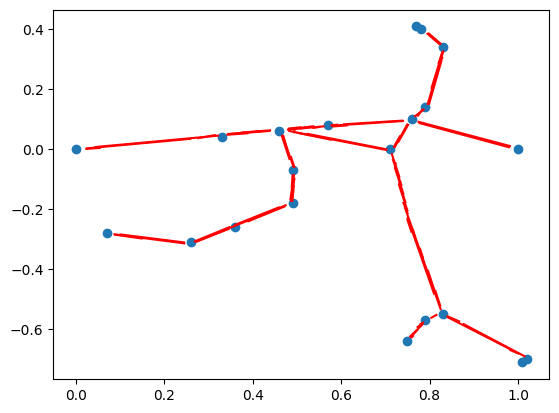

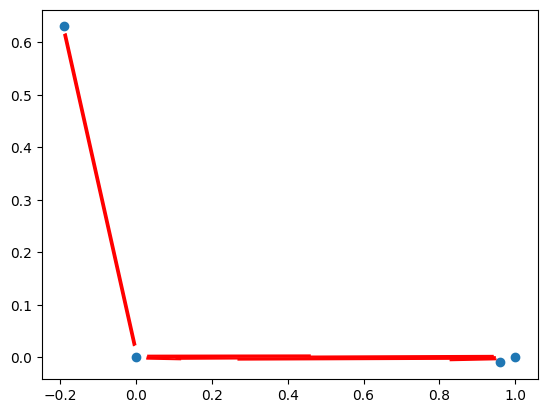

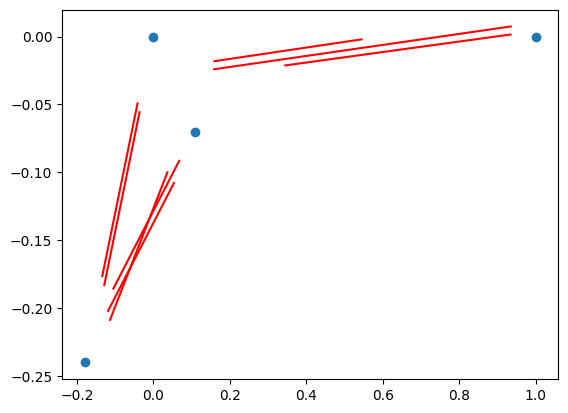

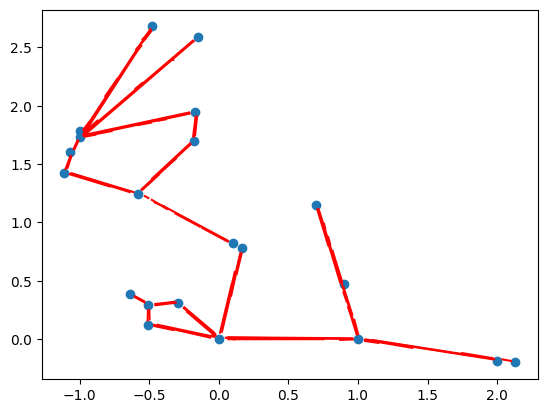

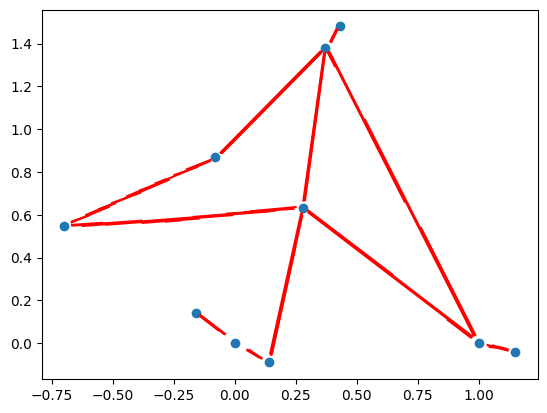

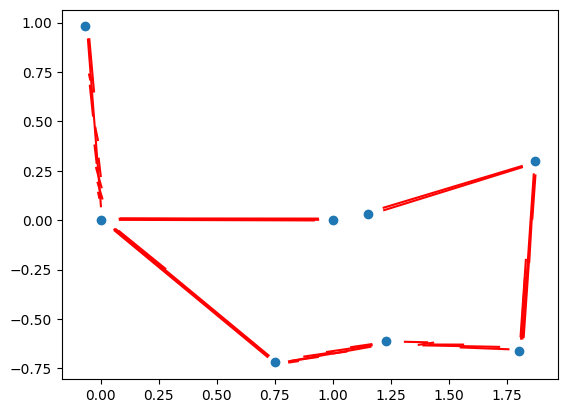

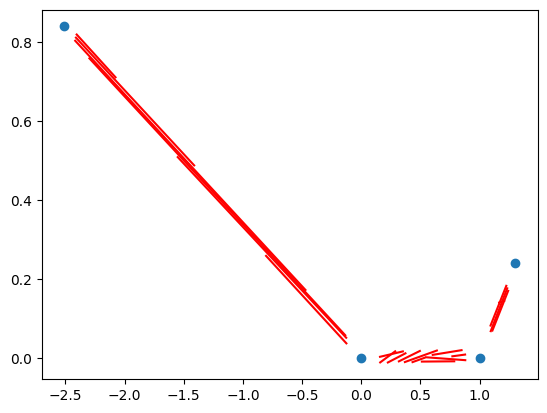

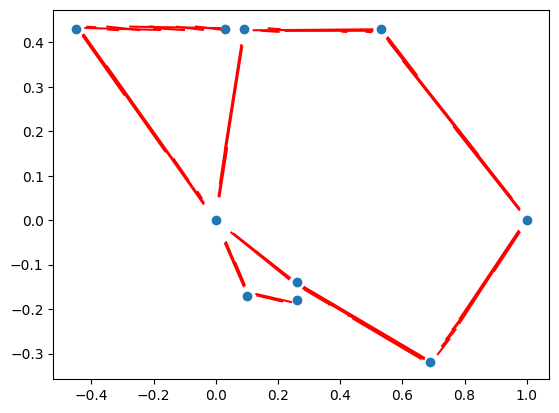

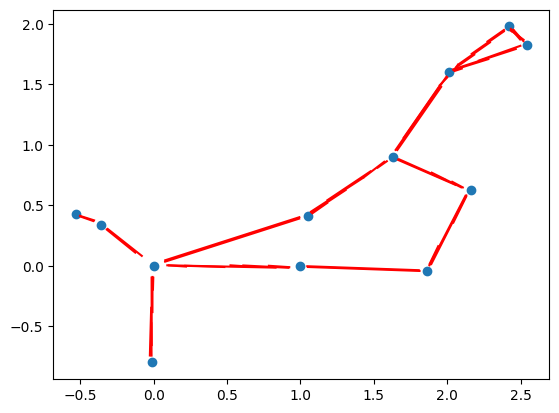

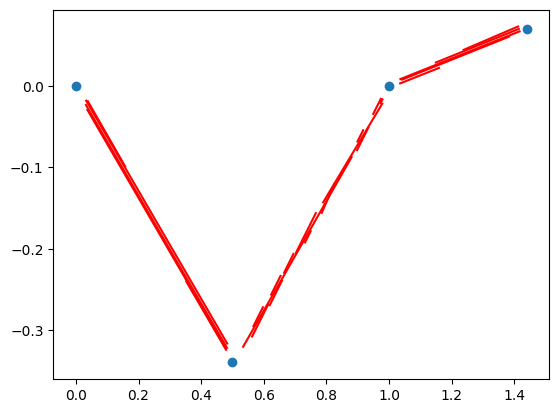

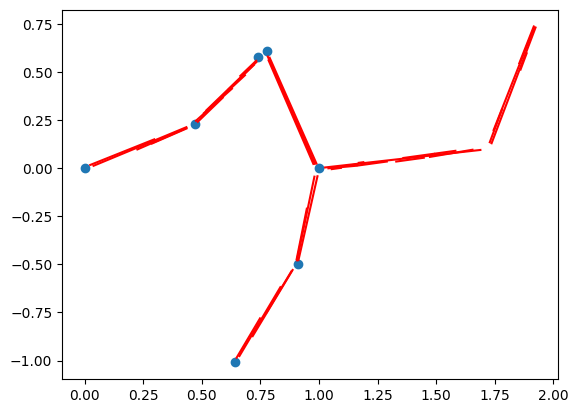

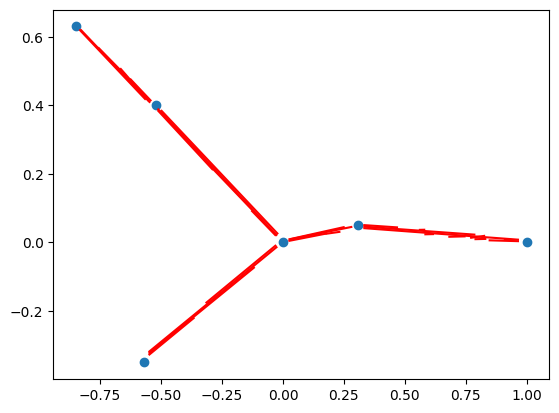

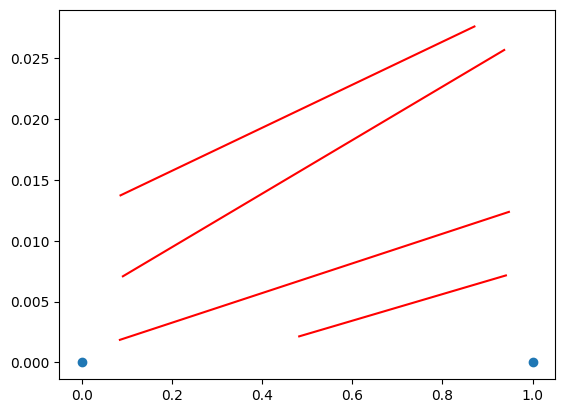

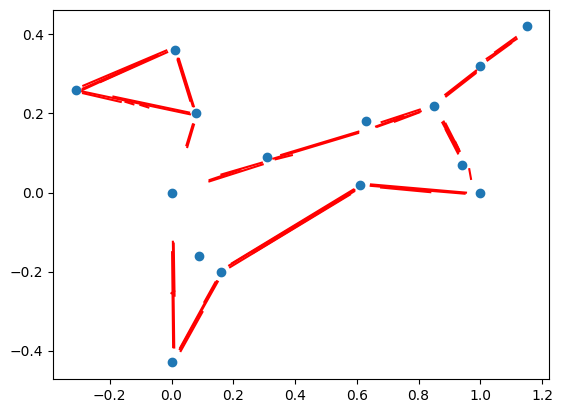

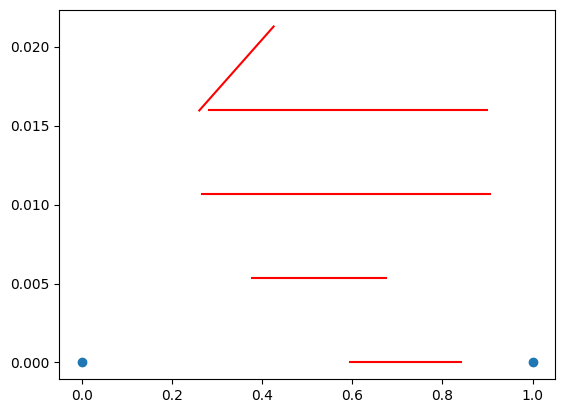

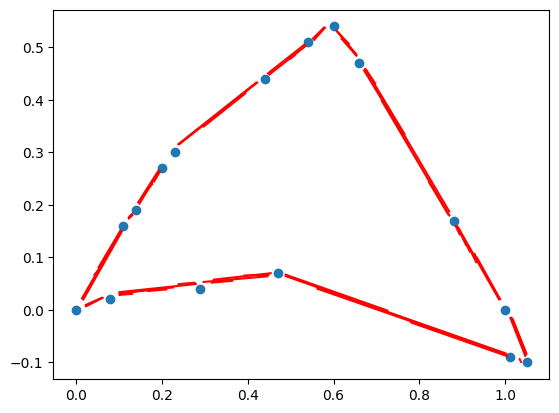

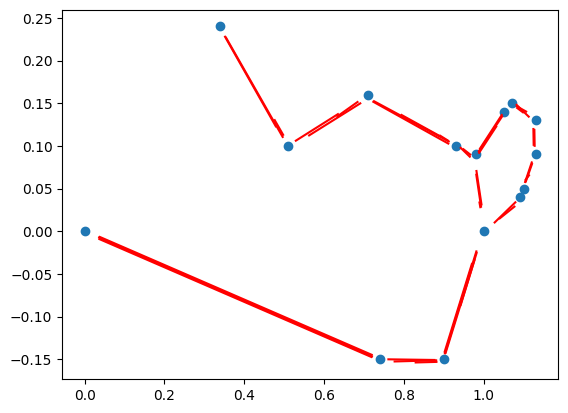

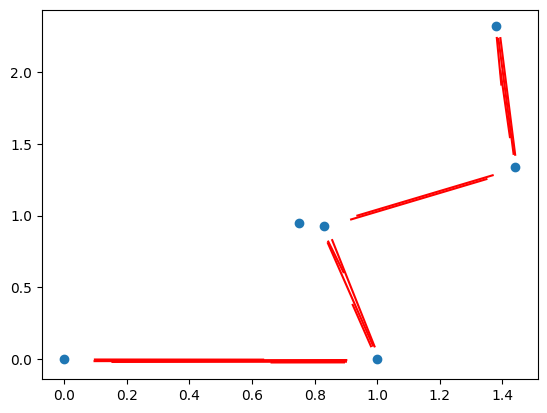

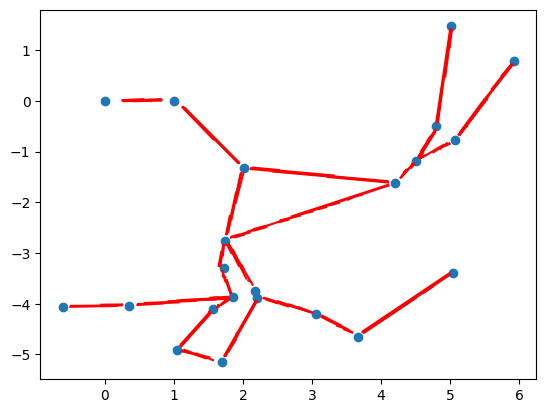

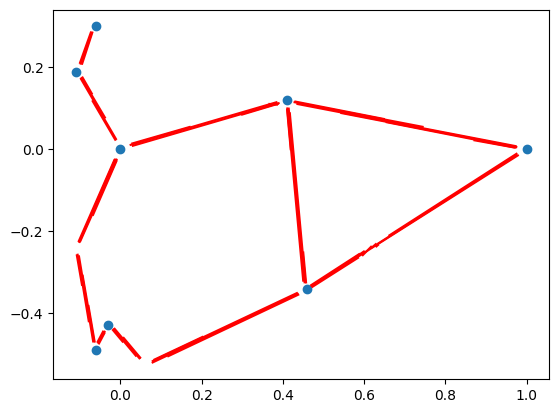

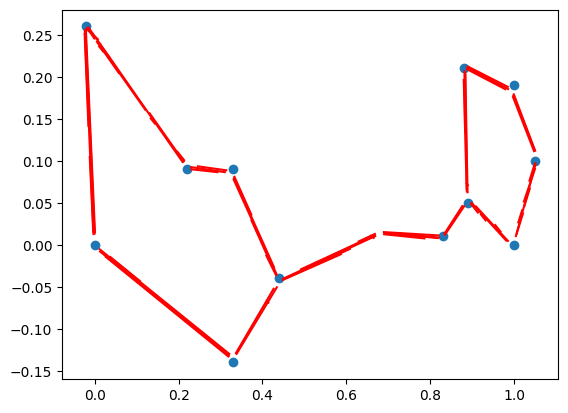

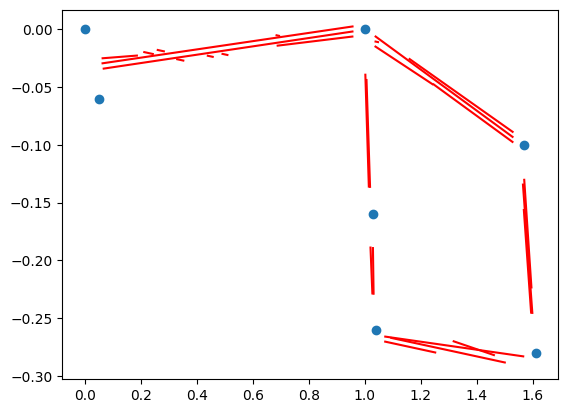

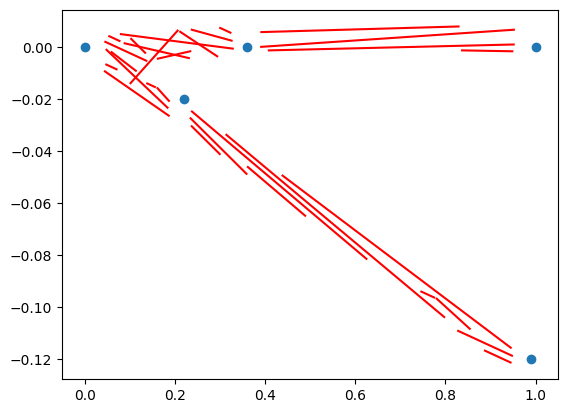

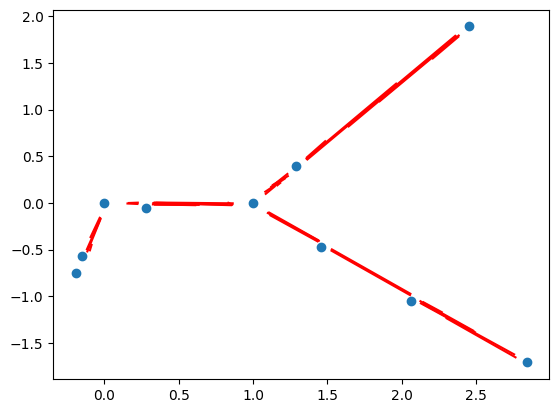

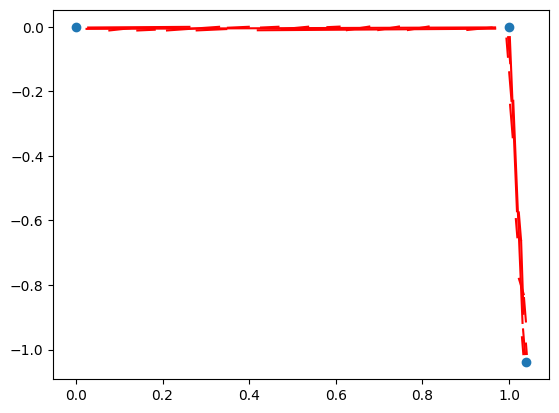

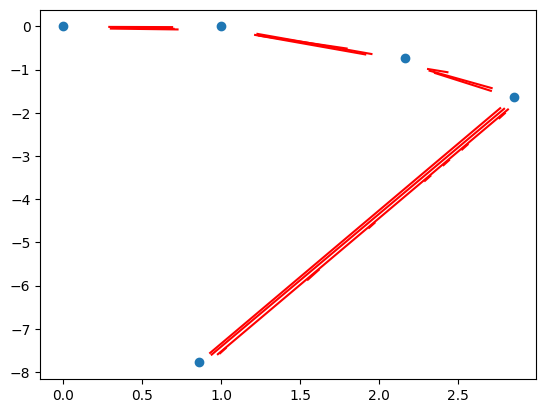

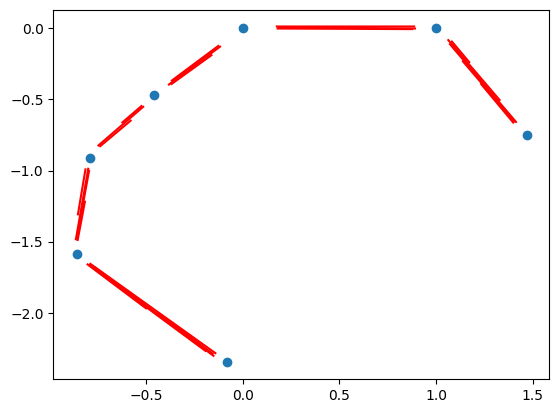

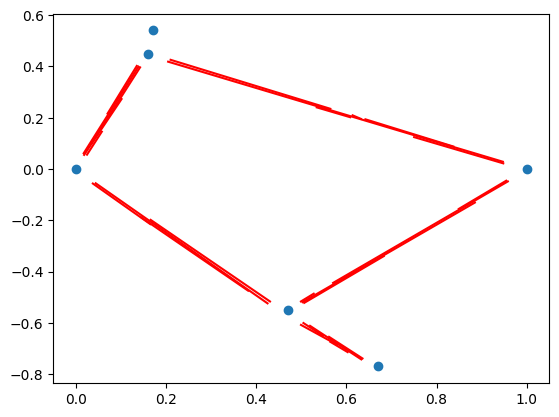

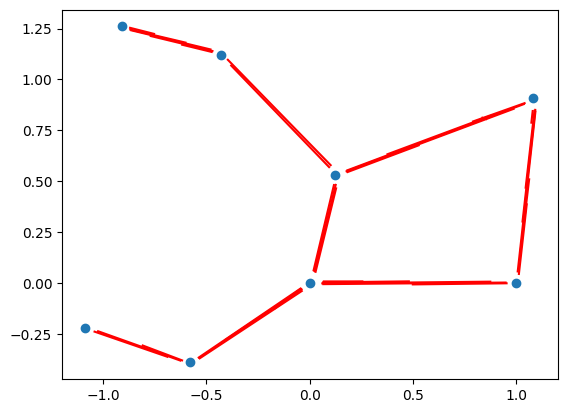

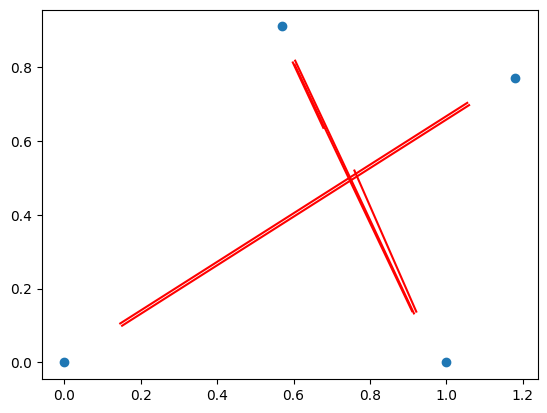

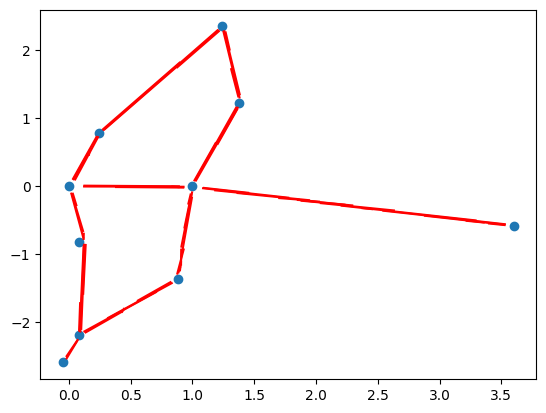

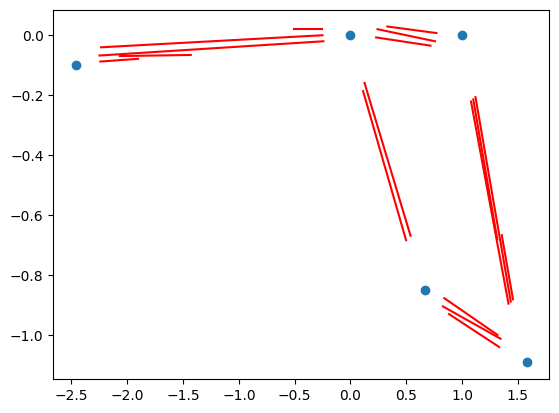

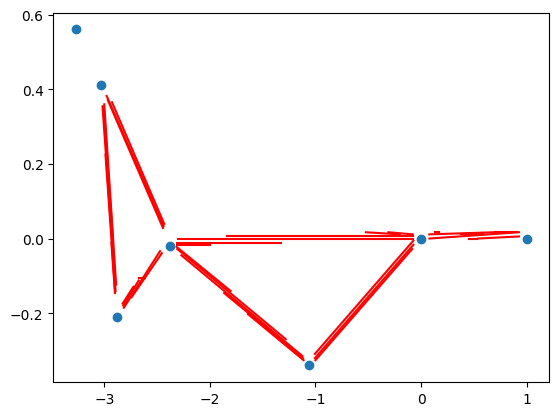

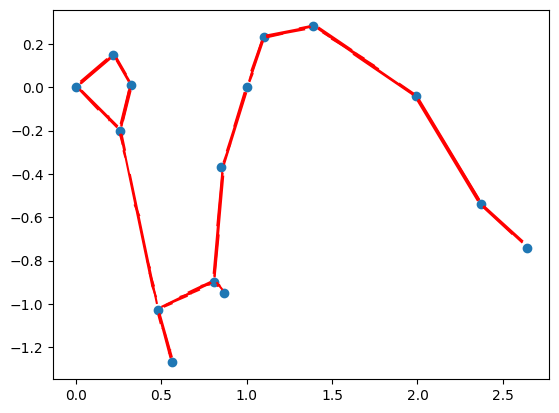

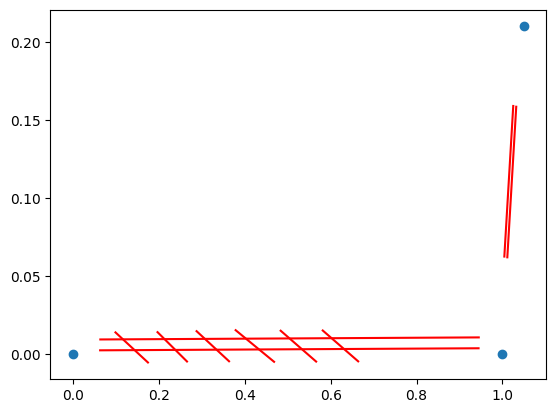

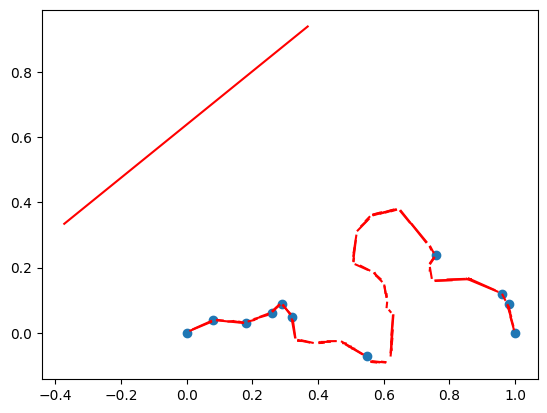

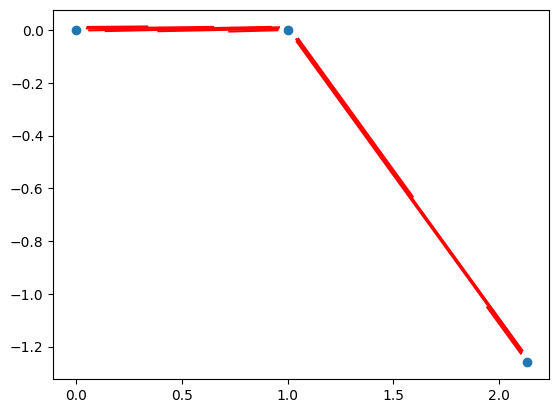

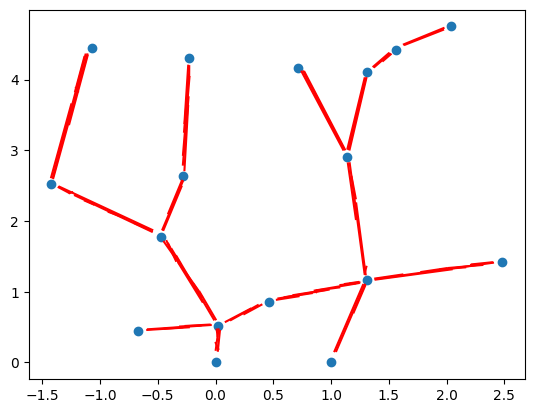

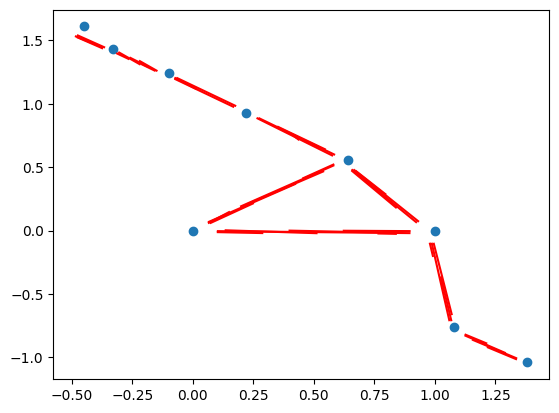

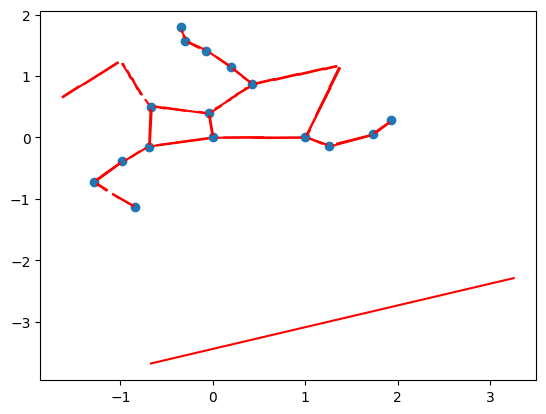

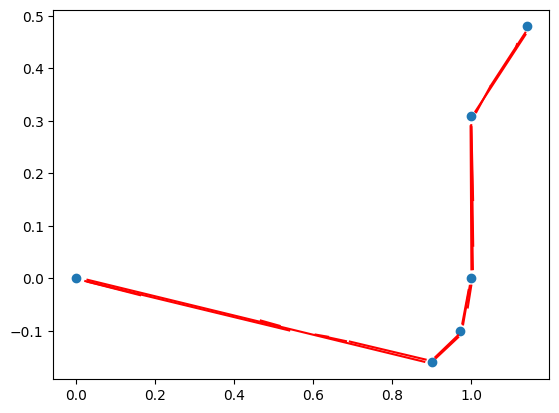

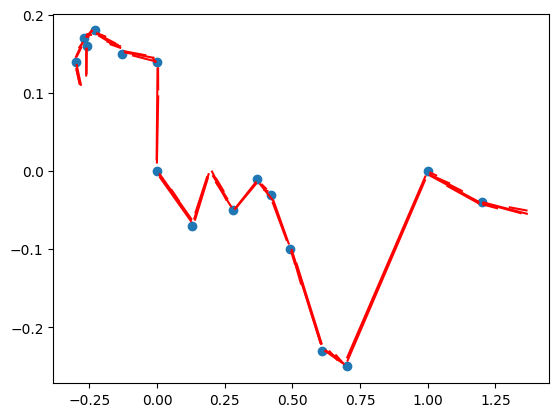

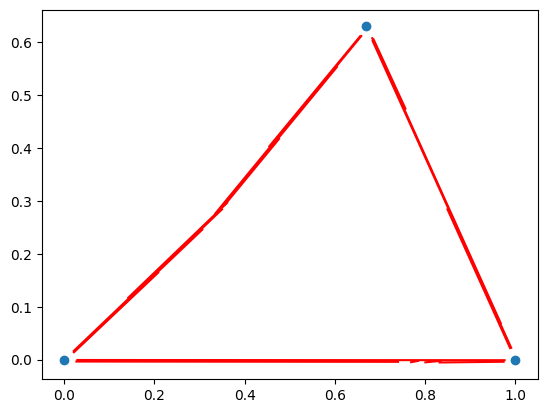

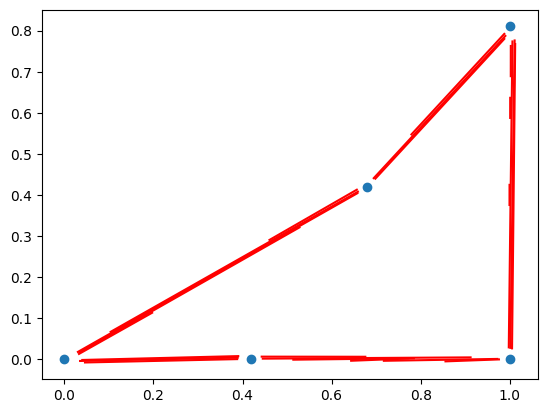

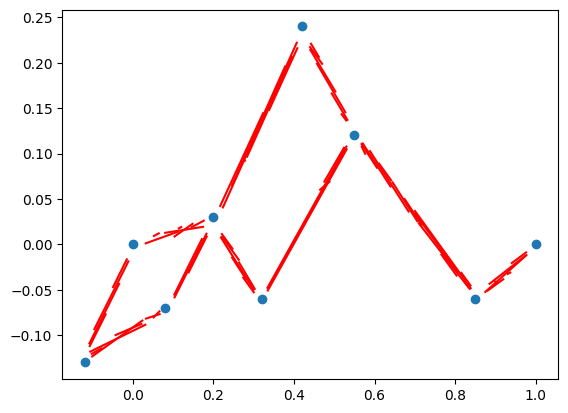

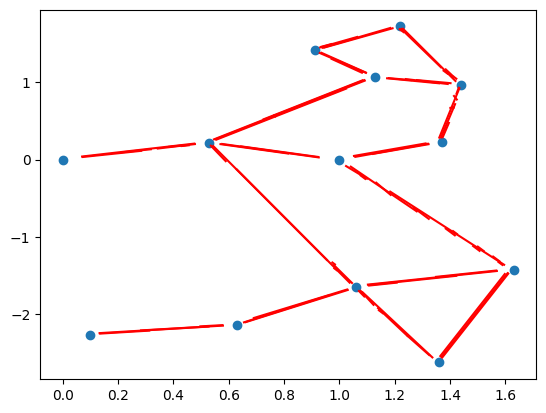

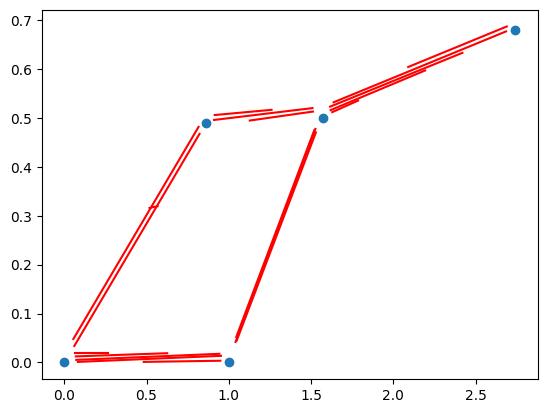

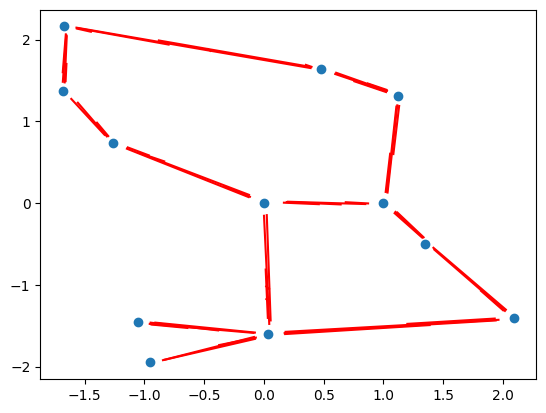

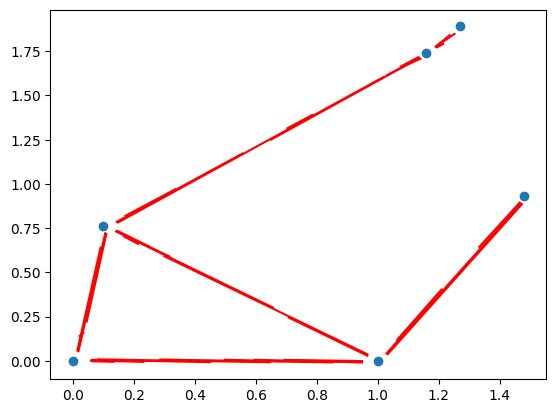

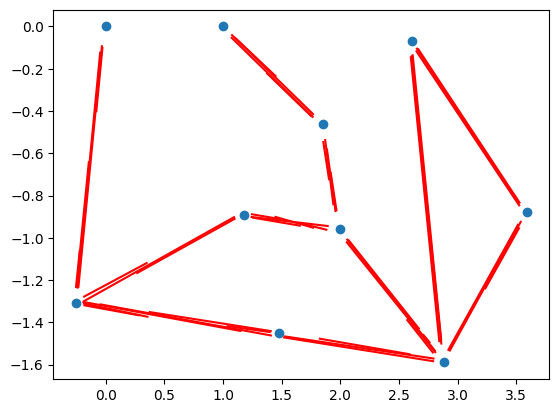

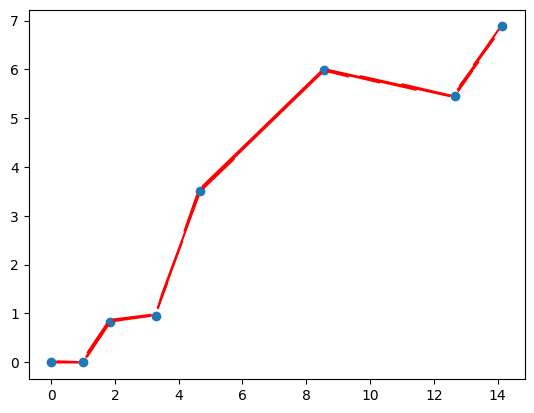

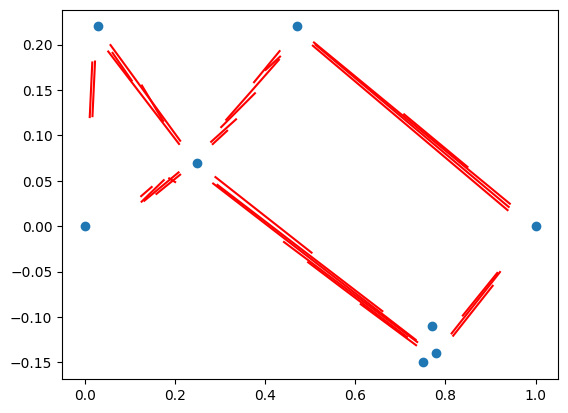

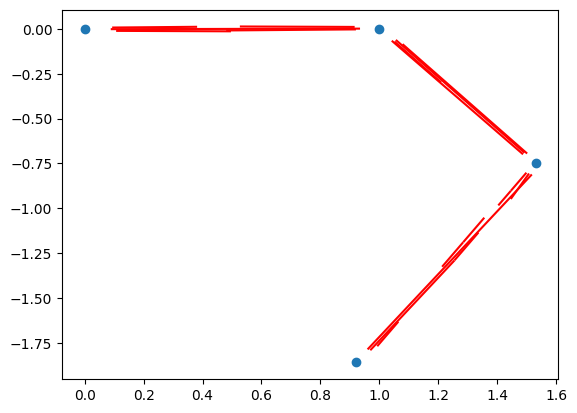

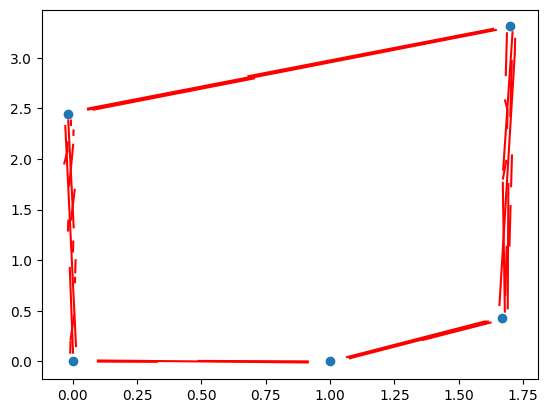

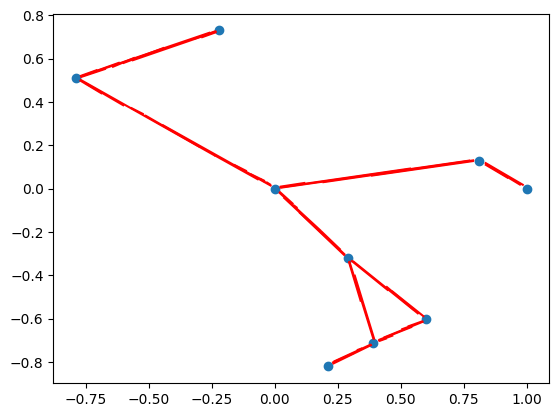

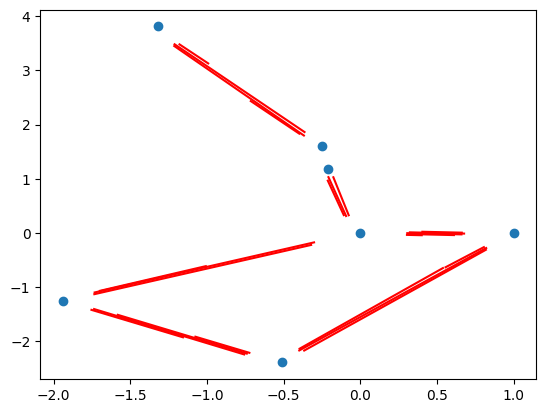

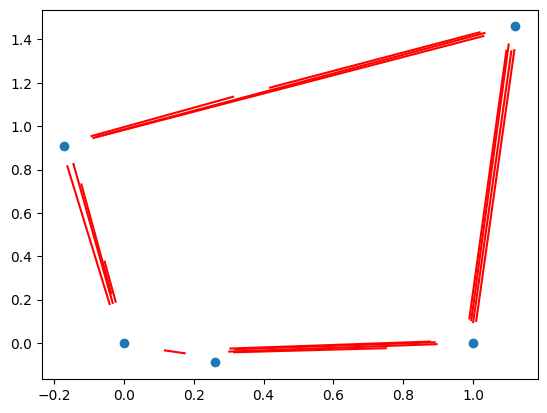

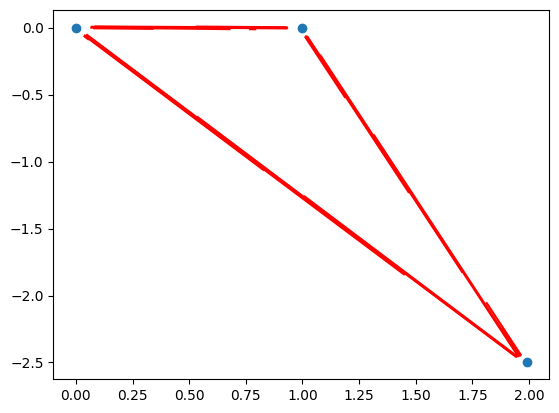

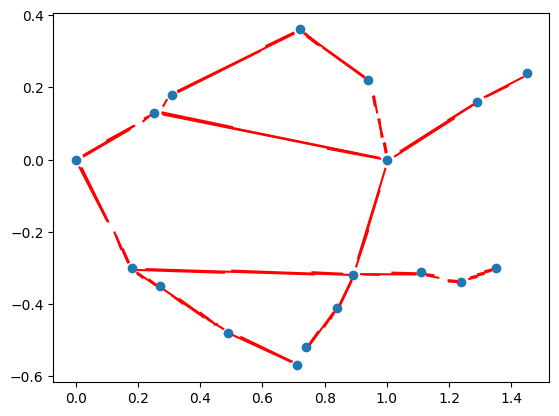

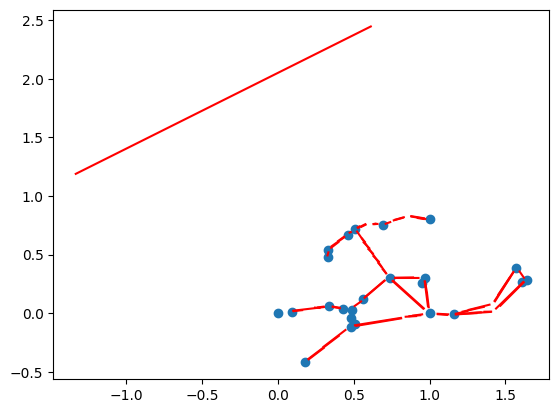

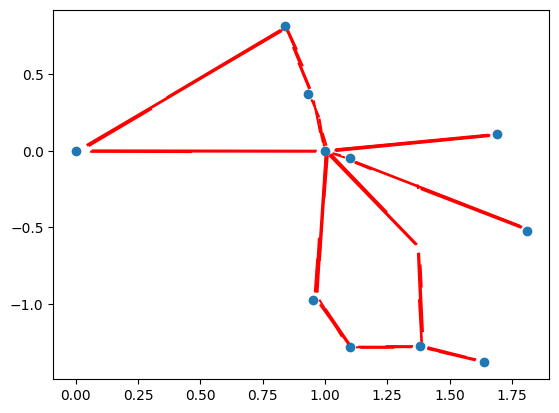

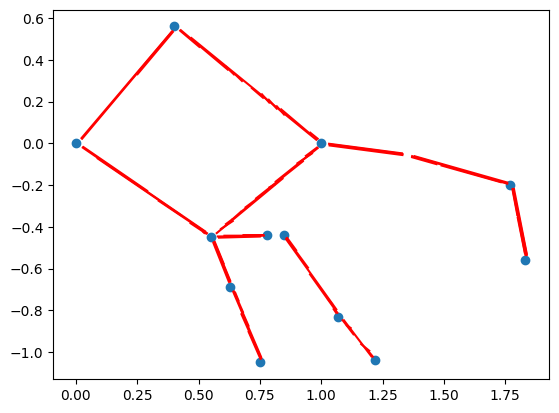

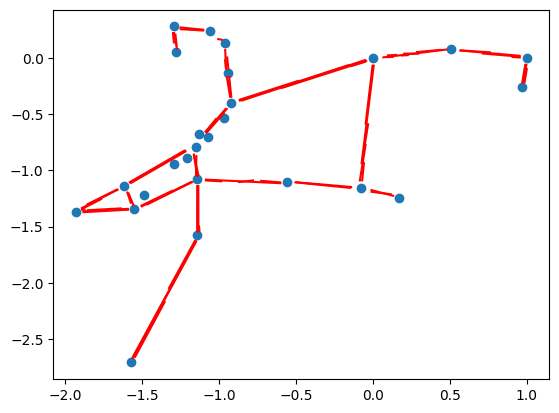

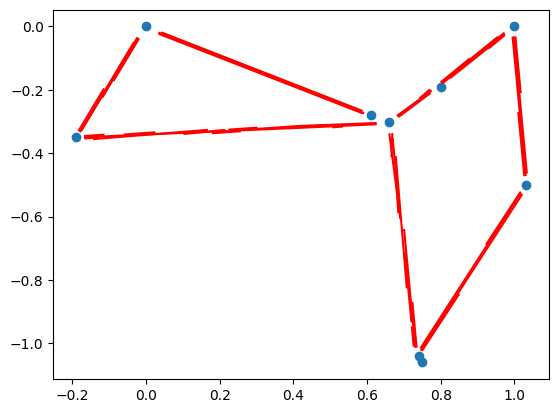

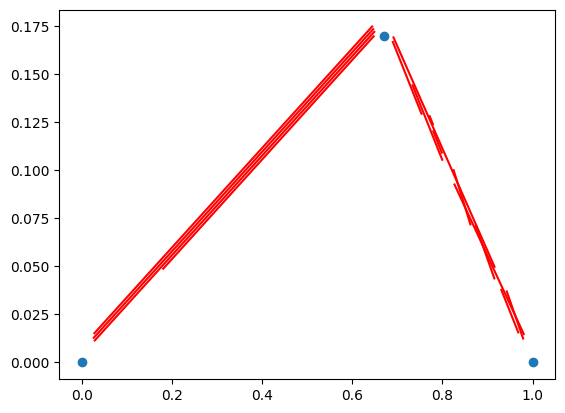

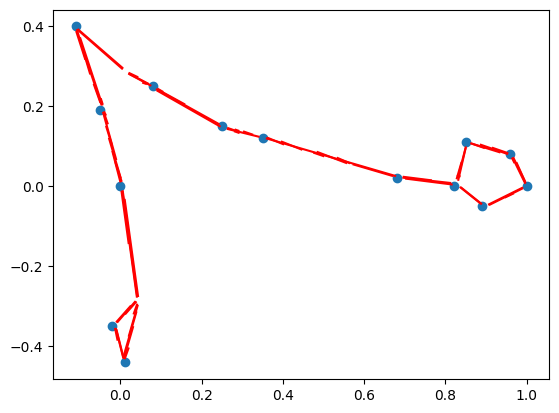

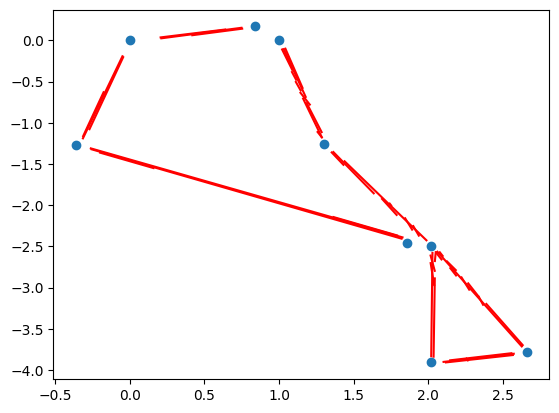

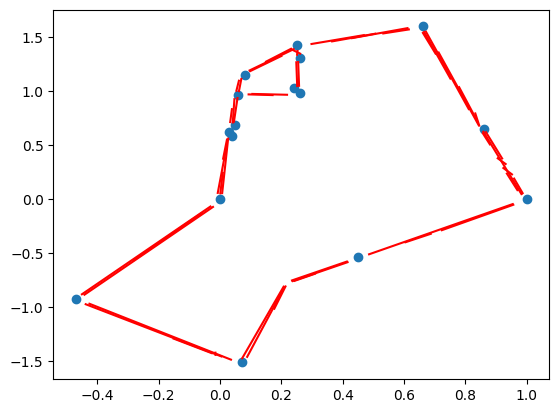

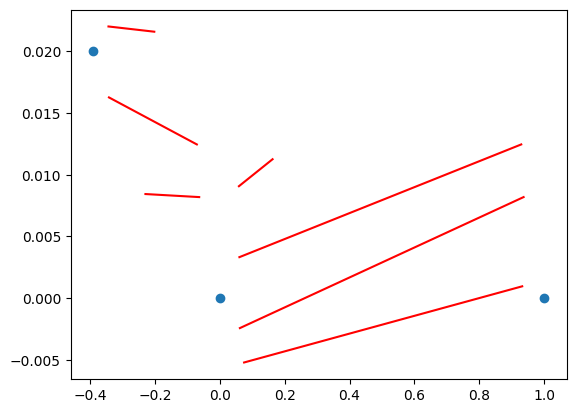

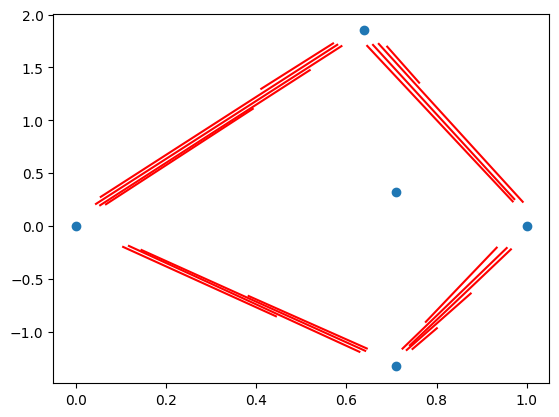

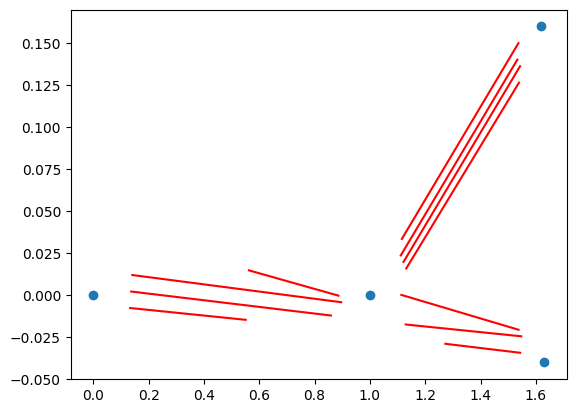

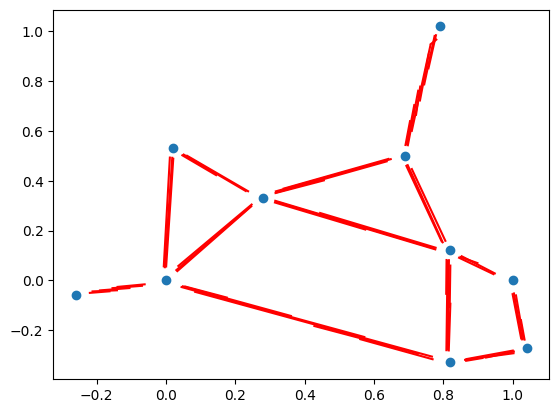

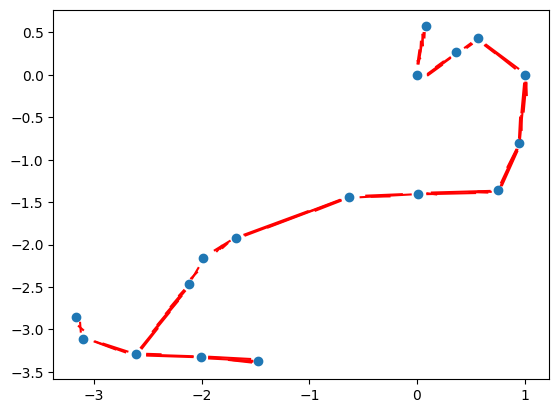

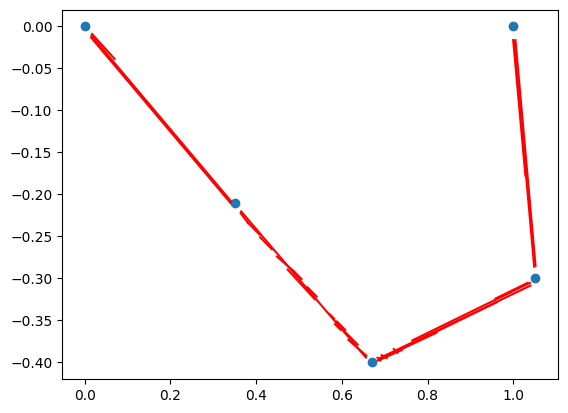

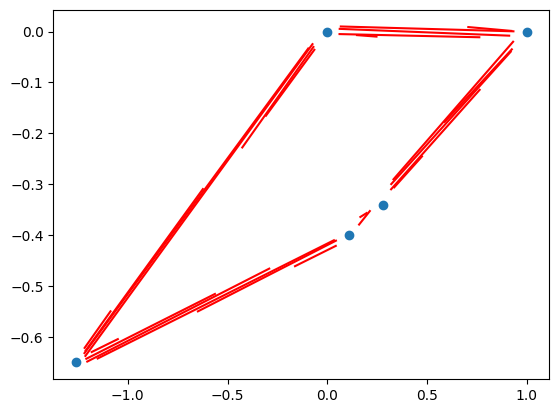

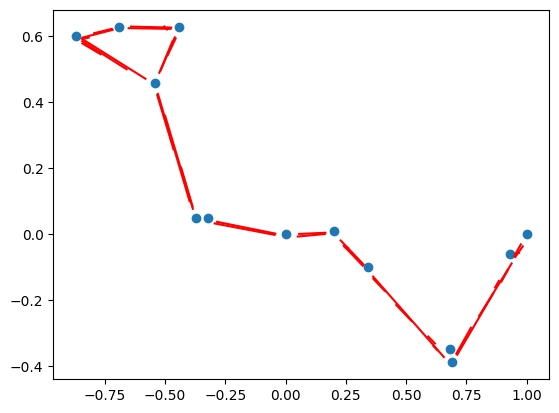

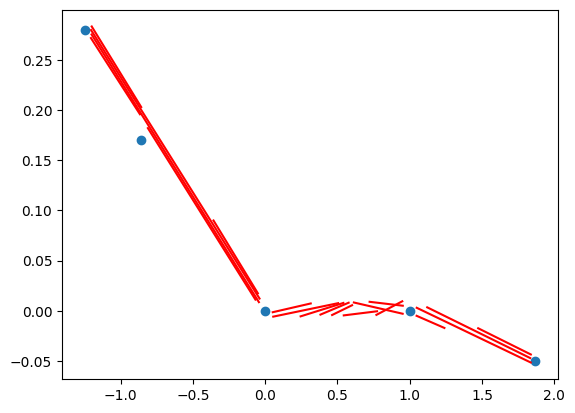

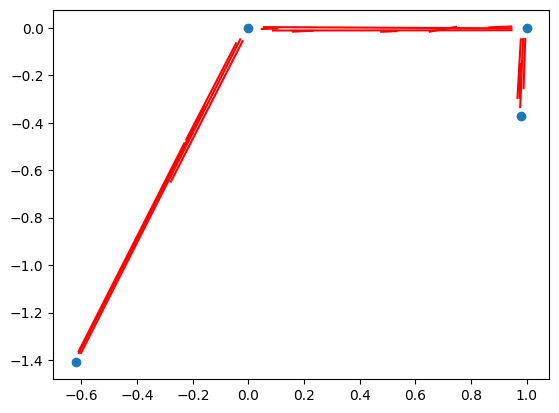

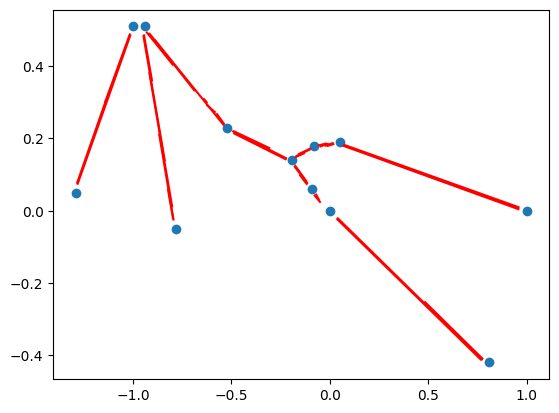

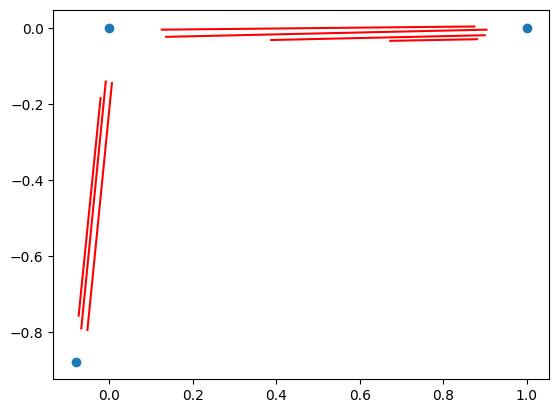

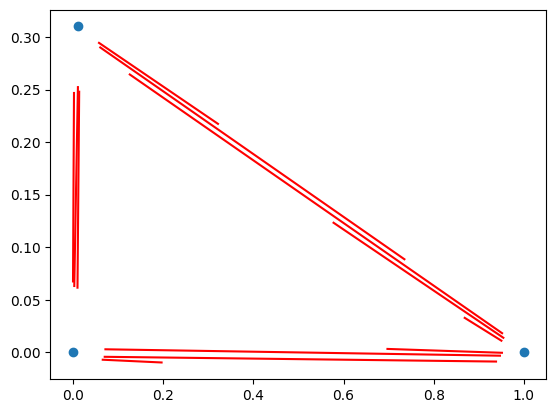

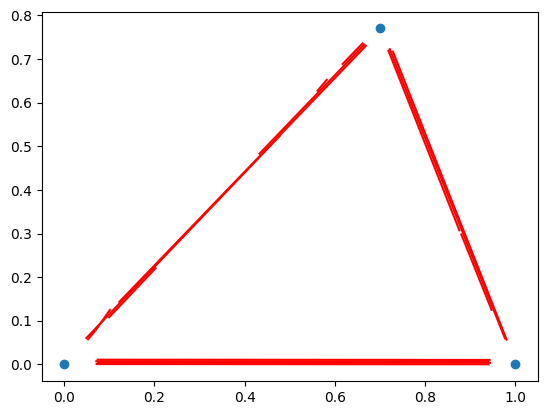

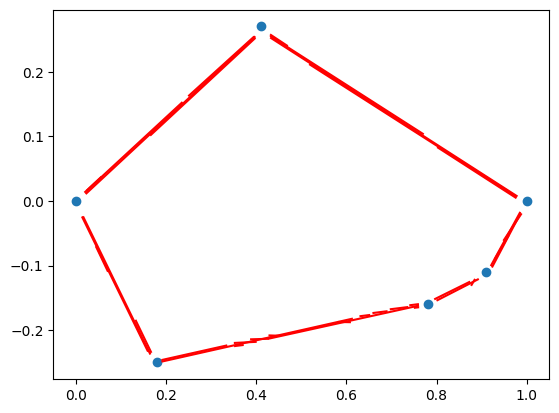

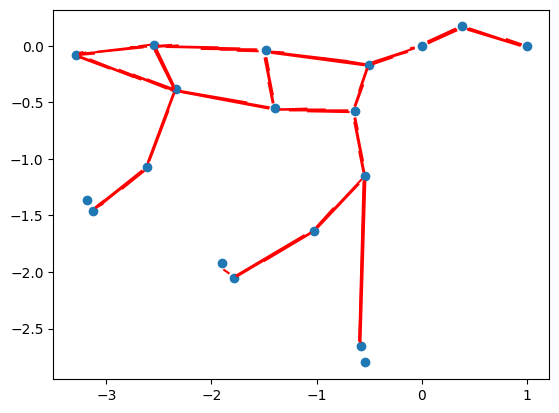

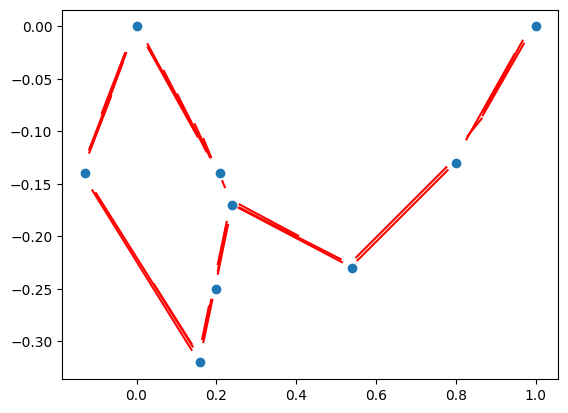

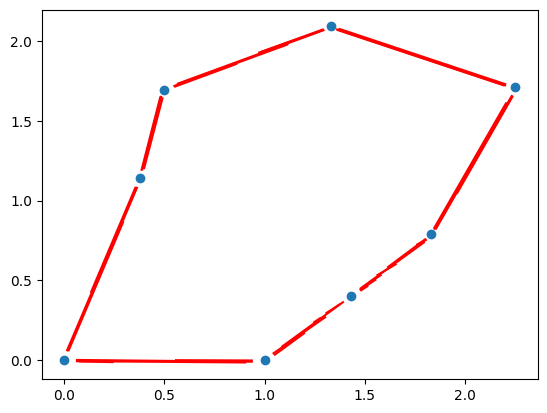

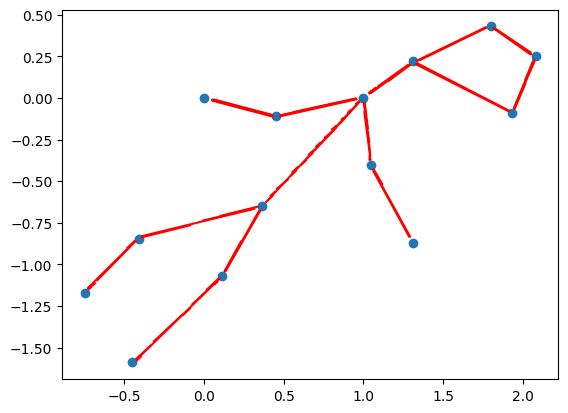

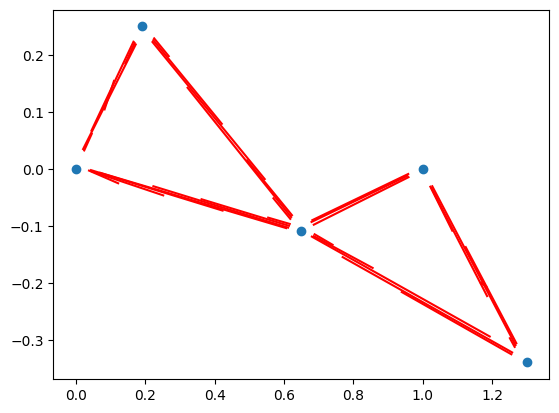

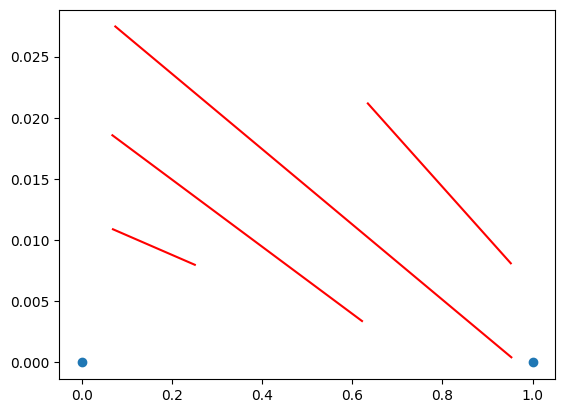

In [34]:
makeTemplates()

In [40]:
 # Save the normalised coordinates for all templates
with open("Template_Coordinates", "wb") as fp:
    pickle.dump(templates_coordinates, fp)

In [13]:
# Plot the specified image with the name given
def plotImage(image, imagename="figure"):
    cv2.imshow(imagename, image)

In [28]:
def test_normaliser(test_path):
    # Process and find the normalised coordinate for each template present in the Templates directory
    # makeTemplates()

    img = cv2.imread(test_path)
    img = getGrayscale(img)
    cv2.imshow('test_img', img)

    a = 50
    thresh = binariseImage(img, [5])#########################190
    # Subtracting to get only stars
    final = thresh[0]
    plotImage(final, "final")
    # cv2.imwrite("./final.png", final)
    stars = applyMedian(final, 5)
    # plotImage(stars, "stars")

    # stars_grey = getGrayscale(stars)
    # final_stars = binariseImage(stars, [70])
    # final_stars_inverted = invertImage(final_stars[0])
    final_stars_inverted = invertImage(stars)
    # plotImage(final_stars[0], "final stars")

    edged = findEdges(final_stars_inverted, 30, 200)
    plotImage(edged, "edges")

    edge_copy = edged.copy()
    contours, hierarchy = cv2.findContours(edge_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    final_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if area != 0:
            final_contours.append(contour)

    # print("Number of Contours found = " + str(len(final_contours)))

    coordinates_list = iterateArea(final_contours, [], True)
    # print(coordinates_list)

    # plt.figure("Normalised stars")
    # plt.scatter(x, y)
    # plt.show()

    return coordinates_list

# x, y, _ = iterateArea(final_contours)
# plt.figure("Normalised stars")
# plt.scatter(x, y)
# plt.show()
# return [(x, y)]

In [15]:
def simillarity_error(train, test):
    threshold = 0.05 * 1
    error = 1e-100
    count = 0
    for i in range(train[0].shape[0]):
        distances = np.sqrt((test[0] - train[0][i]) ** 2 + (test[1] - train[1][i]) ** 2)
        min_dist = min(distances)
        if min_dist < threshold:
            count += 1
            error += min_dist

    return count, error

In [26]:
import pickle

file = open('Template_Coordinates', 'rb')
template_coordinate = pickle.load(file)

In [16]:
constellations_by_size = ["Hydra", "Virgo", "UrsaMajor", "Cetus", "Hercules", "Eridanus", "Pegasus", "Draco",
                          "Centaurus", "Aquarius", "Ophiuchus", "Leo", "Bootes", "Pisces", "Sagittarius", "Cygnus",
                          "Taurus", "Camelopardalis", "Andromeda", "Puppis", "Auriga", "Aquila", "SerpensCaput",
                          "SerpensCauda", "Perseus", "Cassiopeia", "Orion", "Cepheus", "Lynx", "Libra", "Gemini",
                          "Cancer", "Vela", "Scorpius", "Carina", "Monoceros", "Sculptor", "Phoenix", "CanesVenatici",
                          "Aries", "Capricornus", "ComaBerenices", "CanisMajor", "Pavo", "Grus", "Lupus", "Sextans",
                          "Tucana", "Indus", "Octans", "Lepus", "Lyra", "Crater", "Columba", "Vulpecula", "UrsaMinor",
                          "Telescopium", "Horologium", "Pictor", "PiscisAustrinus", "Hydrus", "Antilia", "LeoMinor",
                          "Pyxis", "Microscopus", "Apus", "Lacerta", "Delphinus", "Corvus", "CanisMinor", "Dorado",
                          "CoronaBorealis", "Norma", "Mensa", "Volans", "Musca", "Triangulum", "Chamaeleon",
                          "CoronaAustralis", "Caelum", "Reticulum", "TriangulumAustralis", "Scutum", "Circinus",
                          "Sagitta", "Equuleus", "Crux"]


def test_runner(constellation):
    test_coordinates = test_normaliser('test_data/' + constellation + '.png')
    true_label = constellation[:]
    # print(len(test_coordinates))

    file = open('Template_coordinates', 'rb')
    template_coordinate = pickle.load(file)
    score = -1
    pred_label = 'None'

    plot_points = []
    for bright_perm in range(len(test_coordinates)):
        for constellation in constellations_by_size:
            x_template, y_template, n_stars, normalised_lines = template_coordinate[constellation]

            e = simillarity_error((x_template, y_template), test_coordinates[bright_perm])
            # score(x_test , y_test , x_template , y_template)
            cur_score = e[0] * (e[0] - 2) / (n_stars * e[1])
            # cur_score = np.exp(e[0] / n_stars) * (e[0]-2) / e[1]
            # print(constellation , e , n_stars , cur_score)

            if e[0] > 2 and score < cur_score < 1e+3:
                pred_label = constellation
                score = cur_score

                plot_points = (x_template, y_template, test_coordinates, normalised_lines)

    plt.figure('Matched ' + true_label + " " + pred_label)
    plt.scatter(plot_points[0], plot_points[1])
    plt.scatter(plot_points[2][bright_perm][0], plot_points[2][bright_perm][1])
    for line in plot_points[3]:
        for x1, y1, x2, y2 in line:
            plt.plot([x1, x2], [y1, y2], color='red')
    plt.savefig("Predicted_images_by_size/" + true_label + " " + pred_label)
    plt.close()

    # print('--------------------'*2 , '\n' , score , pred_label)
    return pred_label

In [46]:
print(template_coordinate)

NameError: name 'template_coordinate' is not defined

In [ ]:
d = ['Andromeda', 'Aquila', 'Auriga', 'CanisMajor', 'Capricornus', 'Cetus', 'Columba', 'Gemini', 'Grus', 'Leo', 'Orion',
     'Pavo', 'Pegasus', 'Phoenix', 'Pisces', 'PiscisAustrinus', 'Puppis', 'UrsaMajor', 'UrsaMinor', 'Vela']
count = 0
for i in d:
    pred = test_runner(i)
    if pred == i:
        count += 1
    else:
        print(i, pred)
print(count / len(d))
cv2.waitKey(0)

Andromeda Sagitta
Capricornus Horologium
Cetus Norma
Columba Tucana
Gemini Equuleus
Grus Reticulum
Orion Pyxis
Pavo Chamaeleon
Pegasus Antilia
Phoenix Hydrus
Pisces LeoMinor
PiscisAustrinus Cancer
Puppis Telescopium
UrsaMajor Puppis
UrsaMinor Hydrus
Vela Hydrus
0.2


In [1]:
import cv2
import pickle


def crop(img, dest_folder):
    # height = img.shape[0]
    # width = img.shape[1]
    img = cv2.imread(img)
    for r in range(0, img.shape[0], 200):
        for c in range(0, img.shape[1], 200):
            cv2.imwrite(f"{dest_folder}img{r}_{c}.png", img[r:r + 300, c:c + 300, :])


def test_big_image(folder):
    labels = []
    file = open('Template_Coordinates', 'rb')
    template_coordinate = pickle.load(file)

    for image_file in os.listdir(folder):
        test_coordinates = test_normaliser(folder + image_file)
        #true_label = constellation[:]
        # print(len(test_coordinates))
        #print(image_file)
        score = -1
        pred_label = 'None'
        #print(test_coordinates)
        plot_points = []
        for bright_perm in range(len(test_coordinates)):
            for constellation in constellations_by_size:
                x_template, y_template, n_stars, normalised_lines = template_coordinate[constellation]

                e = simillarity_error((x_template, y_template), test_coordinates[bright_perm])
                # score(x_test , y_test , x_template , y_template)
                cur_score = e[0] * (e[0] - 2) / (n_stars * e[1])
                # cur_score = np.exp(e[0] / n_stars) * (e[0]-2) / e[1]
                # print(constellation , e , n_stars , cur_score)
                print(e[0], score, cur_score)
                if e[0] > 2 and score < cur_score < 1e+3:
                    pred_label = constellation
                    score = cur_score
                    plot_points = (x_template, y_template, test_coordinates, normalised_lines)
        if plot_points:
            plt.figure('Matched ' + pred_label)
            plt.scatter(plot_points[0], plot_points[1])
            plt.scatter(plot_points[2][bright_perm][0], plot_points[2][bright_perm][1])
            for line in plot_points[3]:
                for x1, y1, x2, y2 in line:
                    plt.plot([x1, x2], [y1, y2], color='red')
            plt.show()
            plt.savefig("Predictions_big_image/" + pred_label + " " + image_file)
            plt.close()
        labels.append(pred_label)
    return labels

    # print('--------------------'*2 , '\n' , score , pred_label)
    #return pred_label

In [13]:
crop("photo1669115858.png", "big_image_split/")

In [2]:
test_big_image("big_image_split/")

NameError: name 'os' is not defined

In [20]:
#/usr/bin/env python3
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, kernel_size=3, padding_size=1, dropout_prob=0.1):
        super(VGG16, self).__init__()
        self.c1=nn.Conv2d(1,128,kernel_size,padding=padding_size)
        self.c2=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.bn1=nn.BatchNorm2d(128)
        self.p1=nn.MaxPool2d(2,stride=2)

        self.c3=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.c4=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.bn2=nn.BatchNorm2d(128)
        self.p2=nn.MaxPool2d(2,stride=2)

        self.c5=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.c6=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.bn3=nn.BatchNorm2d(128)
        self.c7=nn.Conv2d(128,128,kernel_size,padding=padding_size)
        self.p3=nn.MaxPool2d(2,stride=2)

        self.c8=nn.Conv2d(128,256,kernel_size,padding=padding_size)
        self.c9=nn.Conv2d(256,256,kernel_size,padding=padding_size)
        self.bn4=nn.BatchNorm2d(256)
        self.c10=nn.Conv2d(256,256,kernel_size,padding=padding_size)
        self.p4=nn.MaxPool2d(2,stride=2)
        # add the flatten layer in the forward function of p4 itself, similar with others
        self.drop=nn.Dropout(p=dropout_prob)
        self.fc1=nn.Linear(36864,1024)
        self.bn5=nn.BatchNorm1d(1024)
        self.fc2=nn.Linear(1024,1024)
        self.fc3=nn.Linear(1024,88)


    def forward(self,x):
        x=self.bn1(self.c1(x))
        x=self.bn1(self.c2(x))
        x=self.p1(x)

        x=self.bn2(self.c3(x))
        x=self.bn2(self.c4(x))
        x=self.p2(x)

        x=self.bn3(self.c5(x))
        x=self.bn3(self.c6(x))
        x=self.bn3(self.c7(x))
        x=self.p3(x)

        x=self.bn4(self.c8(x))
        x=self.bn4(self.c9(x))
        x=self.bn4(self.c10(x))
        x=self.p4(x)

        x=x.view(x.size()[0], -1)
        x=self.bn5(F.relu(self.drop(self.fc1(x))))
        x=self.bn5(F.relu(self.drop(self.fc2(x))))
        x=F.sigmoid(self.fc3(x))

        return x